<a href="https://colab.research.google.com/github/Artty02/NBA/blob/main/DADS5001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv('Team Summaries.csv')



In [ ]:
df.info()

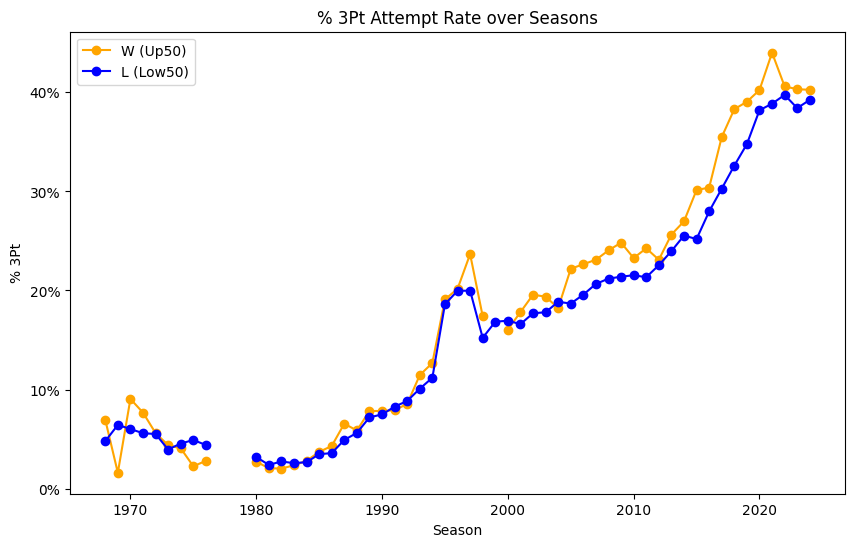

In [ ]:
# Group the data by 'season' and compute the mean of 'x3p_ar' for 'Up50' and 'Low50' groups
df_grouped = df.groupby(['season', 'W>50'])['x3p_ar'].mean().unstack()

# Plotting the graph without showing numbers on the plot points and adjusting the Y-axis to show percentages
plt.figure(figsize=(10, 6))

# Plotting the line for teams with 'Up50'
if 'Up50' in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped['Up50'], label='W (Up50)', color='orange', marker='o')

# Plotting the line for teams with 'Low50'
if 'Low50' in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped['Low50'], label='L (Low50)', color='blue', marker='o')

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('% 3Pt')
plt.title('% 3Pt Attempt Rate over Seasons')

# Adjust Y-axis to show percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Adding the legend
plt.legend()

# Show the plot
plt.show()



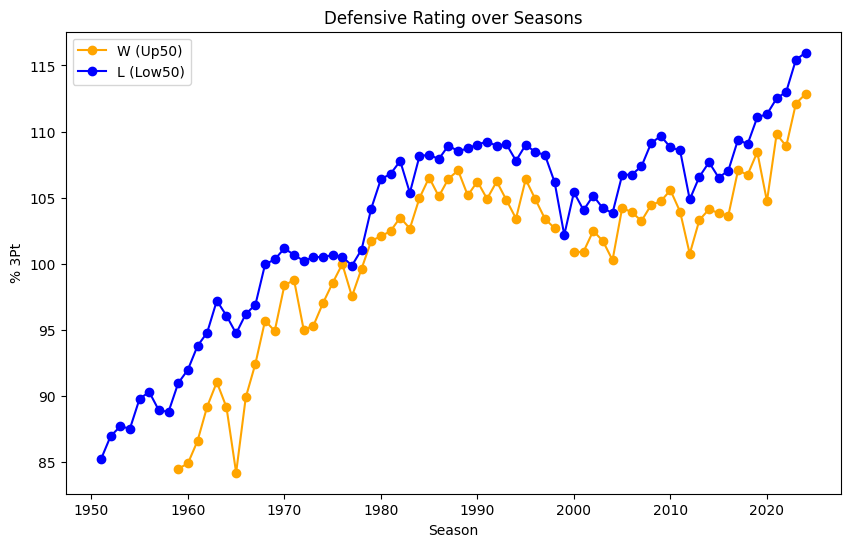

In [ ]:
# Group the data by 'season' and compute the mean of 'x3p_ar' for 'Up50' and 'Low50' groups
df_grouped = df.groupby(['season', 'W>50'])['d_rtg'].mean().unstack()

# Plotting the graph without showing numbers on the plot points and adjusting the Y-axis to show percentages
plt.figure(figsize=(10, 6))

# Plotting the line for teams with 'Up50'
if 'Up50' in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped['Up50'], label='W (Up50)', color='orange', marker='o')

# Plotting the line for teams with 'Low50'
if 'Low50' in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped['Low50'], label='L (Low50)', color='blue', marker='o')

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('% 3Pt')
plt.title('Defensive Rating over Seasons')

# Adding the legend
plt.legend()

# Show the plot
plt.show()



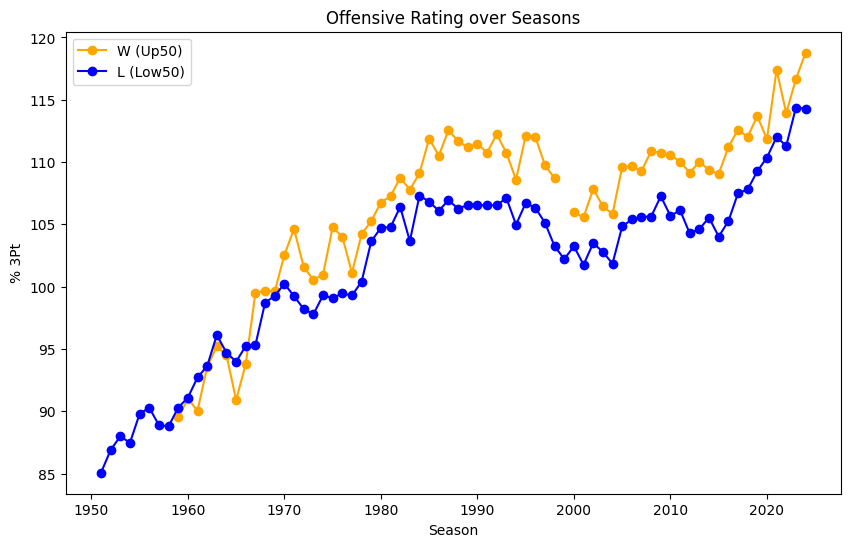

In [ ]:
# Group the data by 'season' and compute the mean of 'x3p_ar' for 'Up50' and 'Low50' groups
df_grouped = df.groupby(['season', 'W>50'])['o_rtg'].mean().unstack()

# Plotting the graph without showing numbers on the plot points and adjusting the Y-axis to show percentages
plt.figure(figsize=(10, 6))

# Plotting the line for teams with 'Up50'
if 'Up50' in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped['Up50'], label='W (Up50)', color='orange', marker='o')

# Plotting the line for teams with 'Low50'
if 'Low50' in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped['Low50'], label='L (Low50)', color='blue', marker='o')

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('% 3Pt')
plt.title('Offensive Rating over Seasons')


# Adding the legend
plt.legend()

# Show the plot
plt.show()



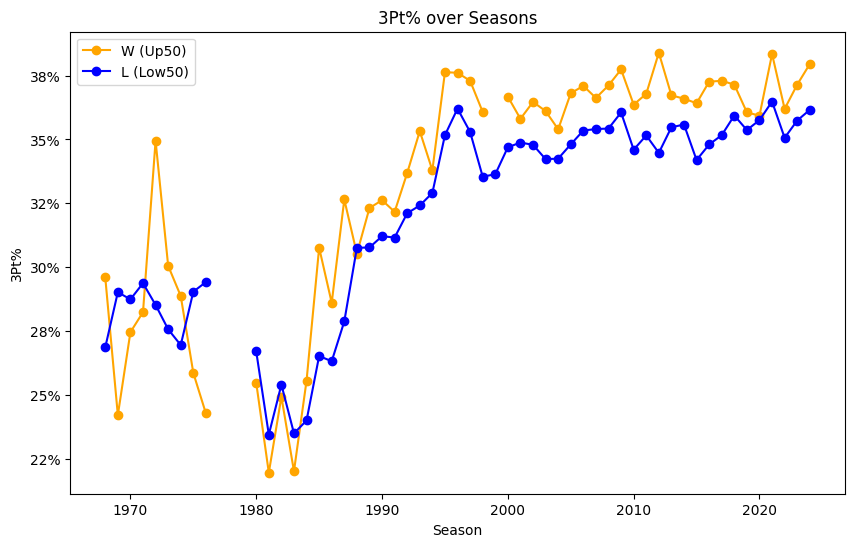

In [ ]:
# Re-create 'W>50' based on wins ('w') column from df
df['W>50'] = df['w'].apply(lambda x: 'Up50' if x >= 50 else 'Low50')

# Now merge again
df_merged = pd.merge(df_new, df[['team', 'season', 'W>50']], on=['team', 'season'], how='left')

# Group by 'season' and 'W>50', and calculate the mean of 'x3p_percent' for each group
df_grouped_percent = df_merged.groupby(['season', 'W>50'])['x3p_percent'].mean().unstack()

# Plot the graph for 'x3p_percent' based on the W>50 column from the original data
plt.figure(figsize=(10, 6))

# Plot for teams with W>50 (Up50)
if 'Up50' in df_grouped_percent.columns:
    plt.plot(df_grouped_percent.index, df_grouped_percent['Up50'], label='W (Up50)', color='orange', marker='o')

# Plot for teams with W<50 (Low50)
if 'Low50' in df_grouped_percent.columns:
    plt.plot(df_grouped_percent.index, df_grouped_percent['Low50'], label='L (Low50)', color='blue', marker='o')

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('3Pt%')
plt.title('3Pt% over Seasons')

# Adjust Y-axis to show percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Adding the legend
plt.legend()

# Show the plot
plt.show()
